# Phase 2 - INFO 2950 Final Project

### Luke Ellis

## Introduction

Music has long been a passion of mine, so my mind instantly focused on the analysis of music when the open-ended nature of this project was presented. Well I certainly do not regret choosing this topic, I do realize that it is much more difficult than initially expected. Like most art forms, Music is an extremely subjective field, and the more quantifiable parts of music present many computational challenges to obtain. For example, to create a large dataset of songs with their tempos (beats per minute) is a difficult task requiring a powerful computer and a lot of time. Or if one wished to classify the genre of 200,000 songs, they would run into issues of classification before they even start thinking of how to handle such a task computationally. Many songs do not simply and obviously fall into one category of music. Different listeners across different regions classify the same piece of music as different styles or genres. 

So for this project, I decided to not lose focus trying to solve a controversial aspect of music before even starting my analyses. Instead, I decided to use the Billboard Hot 100 Chart, with data over the past 60 or so years, as the centerpiece of my investigations. Since the Billboard Hot 100 represents a significant part of the culture of the United States, I figured I would attempt to cross reference this data with other major datasets, such as those relating to the economy or politics. And I'm sure between now and the final deadline of the project, I will think of a few more datasets with which I'd like to cross reference. My goal in the next couple weeks is to figure out how to merge the lyrics of the songs to the dataset, as this will open new doors for analysis.



## Research Questions

- What trends does the Billboard Hot 100 contain within itself?
- Does the volatility of the Billboard Hot 100 correlate inversely with the volatility of the stock market?
- How do the lyrics/content of songs change during election years?
- Are songs about romance more likely to land a spot on the Billboard Hot 100?
- What are the most common lyrics in songs on the Hot 100?

## Data Appendix

Here I'll explain the current state of my data. I have plans to merge more data in the future.

In [3]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt

In [4]:
charts = pd.read_csv("Hot Stuff.csv")
vix = pd.read_csv("VIX.csv")

- Hot Stuff.csv is a file of the Billboard Hot 100's entries from August 2, 1958 to May 29, 2021
- VIX.csv is a table of daily data for the VIX Volatility Index from January 3, 1990 to October 19, 2021

In [5]:
charts.WeekID = pd.to_datetime(charts.WeekID, errors='ignore', infer_datetime_format=True)
vix.Date = pd.to_datetime(vix.Date, errors='ignore', infer_datetime_format=True)

After importing the CSVs to DataFrames, I converted each tables "date" columns to the Python datetime library.

In [6]:
start = datetime.datetime(1990, 1, 9) ## Earliest VIX data
end = datetime.datetime(2021, 5, 30) ## Latest Billboard Hot 100 data

shortChart = charts.loc[charts.WeekID > start]
shortChart.sort_values(by='WeekID')

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
288514,http://www.billboard.com/charts/hot-100/1990-0...,1990-01-13,95,Cover Girl,New Kids On The Block,Cover GirlNew Kids On The Block,1,97.0,2,18
90453,http://www.billboard.com/charts/hot-100/1990-0...,1990-01-13,15,Two To Make It Right,Seduction,Two To Make It RightSeduction,1,18.0,15,10
318630,http://www.billboard.com/charts/hot-100/1990-0...,1990-01-13,81,Get On Your Feet,Gloria Estefan,Get On Your FeetGloria Estefan,1,80.0,11,16
318227,http://www.billboard.com/charts/hot-100/1990-0...,1990-01-13,64,Leave A Light On,Belinda Carlisle,Leave A Light OnBelinda Carlisle,1,55.0,11,16
158287,http://www.billboard.com/charts/hot-100/1990-0...,1990-01-13,43,Nothin' To Hide,Poco,Nothin' To HidePoco,1,43.0,43,7
...,...,...,...,...,...,...,...,...,...,...
19008,https://www.billboard.com/charts/hot-100/2021-...,2021-05-29,67,His & Hers,"Internet Money, Don Toliver & Lil Uzi Vert Fea...","His & HersInternet Money, Don Toliver & Lil Uz...",1,NaN,67,1
204390,https://www.billboard.com/charts/hot-100/2021-...,2021-05-29,54,Your Power,Billie Eilish,Your PowerBillie Eilish,1,29.0,10,3
1793,https://www.billboard.com/charts/hot-100/2021-...,2021-05-29,58,Build A Bitch,Bella Poarch,Build A BitchBella Poarch,1,NaN,58,1
224183,https://www.billboard.com/charts/hot-100/2021-...,2021-05-29,74,Hold On,Justin Bieber,Hold OnJustin Bieber,1,67.0,20,11


I then shortened the original charts DataFrame (which had over 300,000 entries) to just cover the time period that the VIX and Hot 100 datasets overlapped.

In [9]:
## Unique weeks on the Hot 100 in our time range
chartWeeks = sorted(shortChart.WeekID.unique())

chartV = []
for week in chartWeeks:
    songsThatWeek = shortChart.loc[shortChart.WeekID == week]
    chartV.append(songsThatWeek['Weeks on Chart'].sum())

print("First 5 weeks, Chart Volatility Score: ", chartV[:5])

First 5 weeks, Chart Volatility Score:  [1030, 1018, 1012, 999, 996]


Above I created the ***Chart Volatility Score*** for the Billboard Hot 100 data. In the for loop, I found the 100 songs on the chart for each week and then took the sum of their "Weeks on Chart" data. The higher the score, the less volatile the chart was that week. When a new song enters the chart, it has a "Weeks on Chart" value of 1. So the weeks with lower chart volatility scores have more songs that are newer to the Hot 100. 

In [11]:
fiveDayAvg = [0, 0, 0, 0]
for i in range(4, vix.shape[0]):
    fiveDayTotal = vix.at[i, 'Close'] + vix.at[i-1, 'Close'] + vix.at[i-2, 'Close'] + vix.at[i-3, 'Close'] + vix.at[i-4, 'Close']
    fiveDayAvg.append(fiveDayTotal / 5)

vix['FiveDayAvg'] = fiveDayAvg
vix.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,FiveDayAvg
0,1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0.0,0.000
1,1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0.0,0.000
2,1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0.0,0.000
3,1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0.0,0.000
4,1990-01-09,22.200001,22.200001,22.200001,22.200001,22.200001,0.0,19.996
5,1990-01-10,22.440001,22.440001,22.440001,22.440001,22.440001,0.0,20.846
6,1990-01-11,20.049999,20.049999,20.049999,20.049999,20.049999,0.0,21.012
7,1990-01-12,24.639999,24.639999,24.639999,24.639999,24.639999,0.0,21.918
8,1990-01-15,26.340000,26.340000,26.340000,26.340000,26.340000,0.0,23.134
9,1990-01-16,24.180000,24.180000,24.180000,24.180000,24.180000,0.0,23.530


To prepare the VIX data, I added a Five Day Average column that took the average of the closing prices of previous five open market days. This would hopefully smooth the trends in the market and help to alleviate outliers. It would also make the merging of the data a little cleaner and more accurate since the Billboard Hot 100 is also measured over a week.

In [12]:
volatileTable = pd.DataFrame(columns=['Date', 'ChartVScore'])
volatileTable.Date = chartWeeks
volatileTable.ChartVScore = chartV
volatileTable.head()

,Date,ChartVScore
0,1990-01-13,1030
1,1990-01-20,1018
2,1990-01-27,1012
3,1990-02-03,999
4,1990-02-10,996


In [13]:
volatileTable = pd.merge_asof(volatileTable, vix, on="Date")
volatileTable.head()

,Date,ChartVScore,Open,High,Low,Close,Adj Close,Volume,FiveDayAvg
0,1990-01-13,1030,24.639999,24.639999,24.639999,24.639999,24.639999,0.0,21.918000
1,1990-01-20,1018,22.500000,22.500000,22.500000,22.500000,22.500000,0.0,24.304000
2,1990-01-27,1012,26.280001,26.280001,26.280001,26.280001,26.280001,0.0,25.744000
3,1990-02-03,999,24.320000,24.320000,24.320000,24.320000,24.320000,0.0,25.648001
4,1990-02-10,996,23.690001,23.690001,23.690001,23.690001,23.690001,0.0,24.196001


I then made a new table to handle the volatility measures. Since the Hot 100 is usually posted on days the stock market is closed (i.e. no VIX score for that day), I merged the nearest Five Day Average to the chart posting day. So the Date column here has the date of the Billboard's chart posting, but the Five Day Average is probably from the Friday before the date. Now this dataframe is ready for some testing.

In [16]:
peakCharts = charts
peakCharts.sort_values('Peak Position', ascending=True).sort_values('Weeks on Chart', ascending=False).drop_duplicates(['SongID'])

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
302681,http://www.billboard.com/charts/hot-100/2014-0...,2014-05-10,49,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,2,48.0,3,87
302673,http://www.billboard.com/charts/hot-100/2014-0...,2014-03-22,45,Sail,AWOLNATION,SailAWOLNATION,2,41.0,17,79
302665,https://www.billboard.com/charts/hot-100/2021-...,2021-05-29,23,Blinding Lights,The Weeknd,Blinding LightsThe Weeknd,2,12.0,3,76
278572,http://www.billboard.com/charts/hot-100/2009-1...,2009-10-10,48,I'm Yours,Jason Mraz,I'm YoursJason Mraz,1,49.0,6,76
278565,http://www.billboard.com/charts/hot-100/1998-1...,1998-10-10,45,How Do I Live,LeAnn Rimes,How Do I LiveLeAnn Rimes,1,48.0,2,69
...,...,...,...,...,...,...,...,...,...,...
69378,https://www.billboard.com/charts/hot-100/2019-...,2019-11-30,66,The Take,Tory Lanez Featuring Chris Brown,The TakeTory Lanez Featuring Chris Brown,1,NaN,66,1
67753,http://www.billboard.com/charts/hot-100/2011-0...,2011-03-26,66,The Race,Wiz Khalifa,The RaceWiz Khalifa,1,NaN,66,1
69995,https://www.billboard.com/charts/hot-100/2020-...,2020-06-13,66,TKN,ROSALIA & Travis Scott,TKNROSALIA & Travis Scott,1,NaN,66,1
70452,http://www.billboard.com/charts/hot-100/2011-0...,2011-07-02,66,Today Is Your Day,Shania Twain,Today Is Your DayShania Twain,1,NaN,66,1


Finally, I made this ***Peak Charts*** reduction from the full charts data. This DataFrame contains the most useful row for each song as it grabs the row with the highest "Weeks on Chart" value. So it is the last week the song was on the chart, so it has each song's true "peak" position and true "Weeks on Chart" value. When it comes to analysis involving the date, this DataFrame isn't the best as it does not account for split weeks on the chart (i.e. a song leaving the Hot 100 for 2 weeks then coming back). It is also under 10% the size of the original DataFrame.

## Data Description

#### Composition

The data is made up of two main CSV files and reorganized into several DataFrames. 

**Hot Stuff.csv**
The Billboard Hot 100 is an industry standard for tracking the most popular musical recordings in the United States. Its rankings are based off of digital and physical sales of the music, streaming, and radio plays. This dataset is clean, complete, and there are no significant outliers. The breakdown of the columns in this file, found on DataWorld, is as follows:
- **url**: string; this is a link to the Billboard's online database that shows the full chart for the week of the entry.
- **WeekID**: string converted to datetime; the date the chart was published. These are spaced out by a week. 
- **Week Position**: int; the song's current ranking on WeekID's chart.
- **Song**: string; title of the song.
- **Performer**: string; the main musical artist(s) to whom this work is credited.
- **SongID**: string; string concatenation of Song+Performer (no space between)
- **Instance**: int; amount of separate times the song has been on the Hot 100 (e.g. Instance of 2 means the song left the chart for at least a week and came back later once.)
- **Previous Week Position**: int; the position the song appeared on the chart the week prior to the week of WeekID.
- **Peak Position**: int; the highest position a song reached on the chart prior to or including the week of WeekID.
- **Weeks on Chart**: int; the amount of weeks the song has been on the chart in all time prior to and including the week of WeekID.


**VIX.csv**
The VIX (Cboe Volatility Index) is a live market index (similar to how the DOW and NASDAQ behave) that estimates the price volatility of stocks within the S&P500 based on price data and options. It is most widely referenced number when considering market risk, and it also reflects how investors are behaving. This data is downloaded from Yahoo Finance, and the column breakdown is as follows:
- **Date**: string converted to datetime; open market days during which the VIX was calculated. First entry is from January 3, 1990.
- **Open**: float; the value of the index when the trading day started.
- **High**: float; the highest value of the index for that trading day (Date).
- **Low**: float; the lowest value of the index for that trading day (Date).
- **Close**: float; the value of the index when the markets closed on the trading day (Date). 
- **Adj Close**: float; the value of the index when the markets closed on the trading day (Date) adjusted to account for splits, dividends, and capital gains distributions (according to Yahoo). Since this is an index, this column is identical to the Close column (as the value needs no adjustment).
- **Volume**: int; the amount of the asset that has been traded that trading day (Date). Indicies do not get traded, so the value for Volume is 0 for every row.

#### Motivation & Funding

The Billboard Hot 100 Chart is published weekly by Billboard Magazine, which is a division of Media Rights Capital Media & Info. While they do have financial interests in the publication of this magazine, the chart is still viewed as an "Industry Standard," and it is calculated based off of data collected from a wide variety of sources. It has stood the test of time as being an accurate depiction of the top musical landscape, and it is in Billboard's best interests to maintain the integrity of this chart.

The VIX was created and maintained by the Chicago Board Options Exchange (CBOE), which is the world's largest options exchange. Since it is the most widely used volatility measure and it is run by the the CBOE, it comes under a lot of scrutiny from investors, governments, and businesses. Lots of financial interests depend on the accuracy of this index. It is also formulaic in its generation, which increases its dependability.

#### Collection Process

All data used so far has not been collected from indivduals. They are all based on calculations with a variety of quantitative inputs. The Billboard Hot 100 is determined by an equation involving music sales, views, listens, and other popularity measurement sources. The VIX is calculated automatically taking into consideration prices across the S&P 500, historical data, and stock options. No data has been collected manually to my knowledge.

#### Preprocessing and Cleaning

The details of preprocessing and cleaning have been thoroughly examined in the "Data Appendix" section. No existing data has been altered, but certain records have been removed. When looking at both the VIX data and Hot 100 data, the Hot 100 data had to be reduced in order for the dates of the two datasets to overlap fully. The first week of overlapping VIX and Hot 100 data was also dropped since the five day average metric could not be calculated accurately.

#### Privacy Statment

No personal data has been collected from an individual at any point in this process. Human contributions to this data have only been data enterers working for either Yahoo Finance or the Billboard. No data is at risk of being stolen as all of it is already in the public domain.

#### Link to Source Data

Both the VIX and Hot 100 CSV files can be viewed and downloaded here: 
https://drive.google.com/drive/folders/1a3jU_kq8fJVpKr-ItrCXVu6l2q8LdTuP?usp=sharing

## Data Limitations

Of the data used so far, there are not many limitations to how these can be used as the data is complete and clean. Not all of it is useful, but there are many ways in which this data can be compared and analyzed.

As I touched on in my introduction, there are many major factors of music that are unquantifiable. How do you put a number to how a song makes you feel? Spotify has some publicly available metrics that attempt to measure some aspects of music like "energy", "danceability", or speechiness, but the difficulty here is they don't have full measurements for all the songs on the Hot 100, so some songs would need to be dropped from the dataset. If Spotify's data were to be merged with the Hot 100, their algorithms' biases on what types of songs it can and cannot fully evaluate would reflect in the data.

I also considered evaluating spectograms (a visual/graphical representation of frequencies over time in an audio file) of the songs, but the main limitation I ran into here is the amount of storage and processing power/time required for meaningful and full analysis.

## Exploratory Data Analysis

In [14]:
charts.describe()

,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
count,327895.000000,327895.000000,295941.000000,327895.000000,327895.000000
mean,50.499309,1.072538,47.604066,41.358307,9.153793
std,28.865707,0.334188,28.056915,29.542497,7.590281
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.500000,1.000000,23.000000,14.000000,4.000000
50%,50.000000,1.000000,47.000000,39.000000,7.000000
75%,75.000000,1.000000,72.000000,66.000000,13.000000
max,100.000000,10.000000,100.000000,100.000000,87.000000


In [15]:
vix.describe()

,Open,High,Low,Close,Adj Close,Volume,FiveDayAvg
count,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.0,8009.000000
mean,19.557959,20.346117,18.820846,19.481100,19.481100,0.0,19.472629
std,8.105947,8.562156,7.594262,8.032406,8.032406,0.0,7.929560
min,9.010000,9.310000,8.560000,9.140000,9.140000,0.0,0.000000
25%,13.780000,14.395000,13.260000,13.750000,13.750000,0.0,13.758000
50%,17.620001,18.209999,16.969999,17.559999,17.559999,0.0,17.576000
75%,22.959999,23.780000,22.190001,22.840000,22.840000,0.0,22.756000
max,82.690002,89.529999,72.760002,82.690002,82.690002,0.0,74.618001


I first ran describe just to make sure things were working and in order. The values in the Hot 100 DataFrame are especially telling that the data is correct. The maximum Week position is 100 (as it always should be), the minimum position is 1, and the mean is about 50.5, halfway between 1 and 100. The other numbers all make sense too. The VIX data is a little less telling, but the minimums and maximums make sense. It is also important to note that the 'Close' and 'Adj Close' columns appear to be identical. Since this is an index, no adjustments for dividends or splits need to be made, but Yahoo Finance still includes this column. The 'Volume' column is entirely 0 since this is an index and does not get traded.

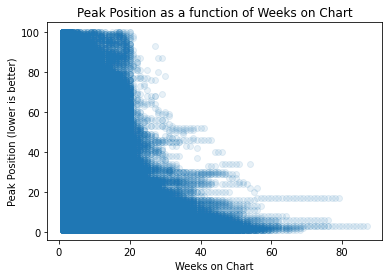

In [17]:
plt.scatter(peakCharts['Weeks on Chart'], peakCharts['Peak Position'], alpha=0.1)
plt.xlabel("Weeks on Chart")
plt.ylabel("Peak Position (lower is better)")
plt.title("Peak Position as a function of Weeks on Chart")
plt.show()

This first graph shows Peak Position (as explained in the Peak Charts DataFrame) as a function of how many weeks a song has spent on the Hot 100. As is visible, it appears songs that spend many weeks on the chart often have a higher peak. It's interesting how this scatter plot almost ended up looking like a histogram, but I guess that is what happens when you have 30,000 data points. There appears to be some sort of correlation here, so I will work on making that clearer and mathematically concrete.

Text(0.5, 1.0, 'Chart Volatility Scores Over Time')

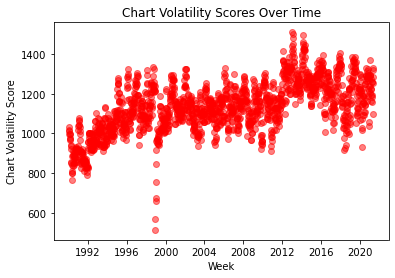

In [21]:
plt.scatter(volatileTable.Date, volatileTable.ChartVScore, alpha=0.5, c="red")
plt.xlabel("Week")
plt.ylabel("Chart Volatility Score")
plt.title("Chart Volatility Scores Over Time")

This graph shows the **Chart Volatility Scores** over time. I will probably also produce one for the whole dataset. I find it interesting how the volatility score fluctuates pretty rapidly. This will require further investigation to see if perhaps there are consistent fluctuations during a calendar or fiscal year.

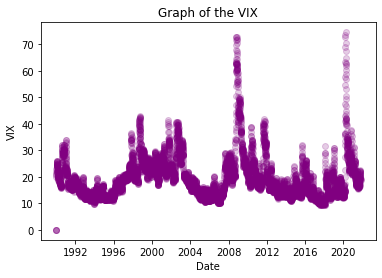

In [24]:
plt.scatter(vix.Date, vix.FiveDayAvg, alpha=0.2, c="purple")
plt.xlabel("Date")
plt.ylabel("VIX")
plt.title("Graph of the VIX")
plt.show()

This graph simply shows the VIX index overtime. The VIX stands for Volatility Index, and it measures general market volatility in the U.S. Stock Exchange. The higher the index, the more volatile the markets are, and vice versa. As you can see, there is a spike in the VIX around the 2008 Recession and around the start of the COVID-19 Pandemic, both of which were turbulent times for the U.S. economy.

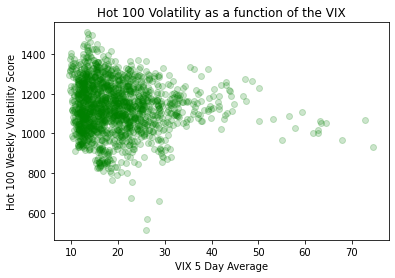

In [25]:
plt.scatter(volatileTable.FiveDayAvg, volatileTable.ChartVScore, alpha=0.2, c="green")
plt.ylabel("Hot 100 Weekly Volatility Score")
plt.xlabel("VIX 5 Day Average")
plt.title("Hot 100 Volatility as a function of the VIX")
plt.show()

This graph is where I've compared the VIX and my own Chart Volatility Score. As you can see, it is mostly a cluster of points with a tail trailing off to the right. The cluster is very heavy though, so I'm not sure if the points going off to the right will have much influence on a fit.

I was expecting to see an inverse correlation between the VIX and Volatility Score. My informal hypothesis was that when the economy is less stable, people listen to music they are more comfortable with (i.e. high VIX means high Volatility Score). If parts of their lives are unsteady or unsure, they will take comfort in the areas they can control. I'm not going to count this thinking out just yet as I would like to play with the scaling and scoring a bit more.

## Questions for Reviewers

- Am I doing too much? This is only a portion of the final report I plan to submit, but I'm wondering if including even more datasets might cause the project to lose focus?
- Would adding lyrics to my Hot 100 chart data be too cumbersome?
- What pitfalls do you see if I were to merge another table with more specific music information (tempo, explicitness, etc.)? I ask because I would have to drop many entries due to insufficient data.